# IND320 Course Project

## Code access and direct links

- The project is deployed here: [ind320-henrikengdal-project](https://ind320-henrikengdal-project.streamlit.app/)
- The code is accessible at the repository: [henrikengdal/ind320-henrikengdal-project](https://github.com/HenrikEngd/IND320-HenrikEngdal-Project.git)

## AI Usage

AI plays a multifaceted role throughout this project, primarily serving as an assistant and analytical tool. The project leverages AI in several areas:

**Development and Code Generation:**
AI assists in writing and optimizing code for the application. 

**Data Analysis and Insights:**
AI helps analyze data patterns and identifying trends. It assists in generating meaningful statistical summaries and suggesting appropriate visualization techniques for the given data.

**Documentation and Communication:**
AI supports the creation of clear documentation, such as code comments, and user interface text. It helps structure the project documentation and ensures technical concepts are communicated effectively.

**Problem-Solving and Debugging:**
Throughout the development process, AI serves as a coding companion, helping troubleshoot issues, optimize data processing workflows, and suggesting best practices.

## Loading the data

In [12]:
import pandas as pd

# Reading form csv file
df = pd.read_csv('assets/open-meteo-subset.csv')

## Reading and exploring the data

In [13]:
# Printing the first 5 rows of the dataframe
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [14]:
# print summary statistics
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


In [15]:
# print info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [16]:
# Convert the 'time' column to datetime format since it was read as an object (string)
df["time"] = pd.to_datetime(df["time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


## Illustrating the data

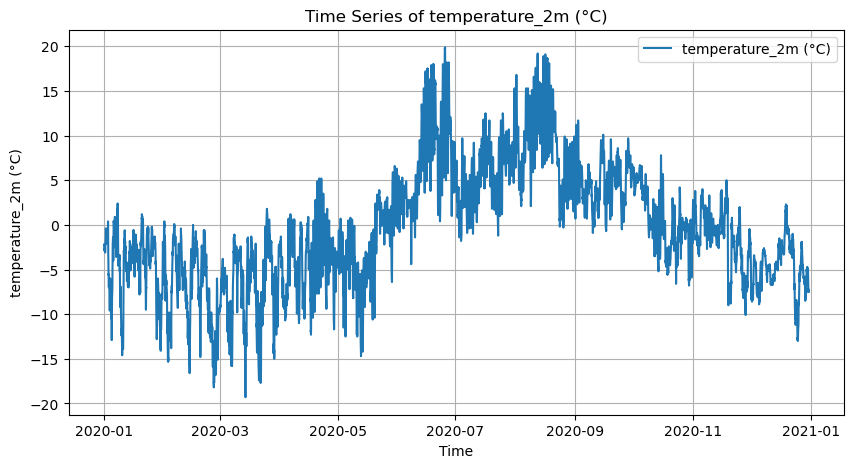

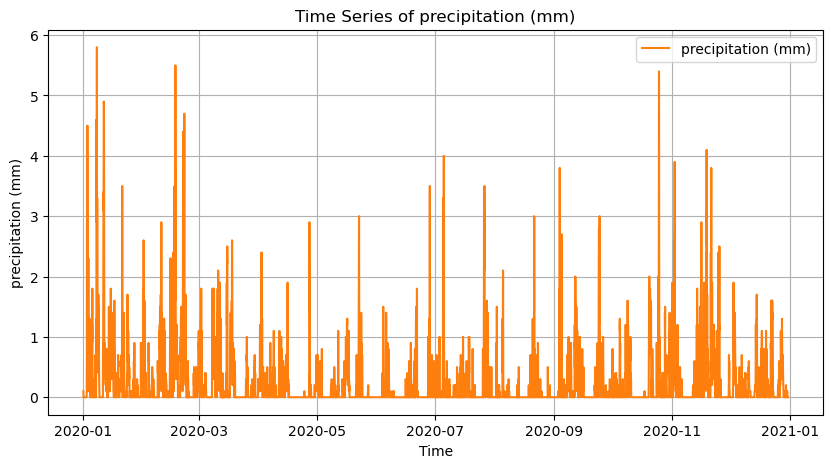

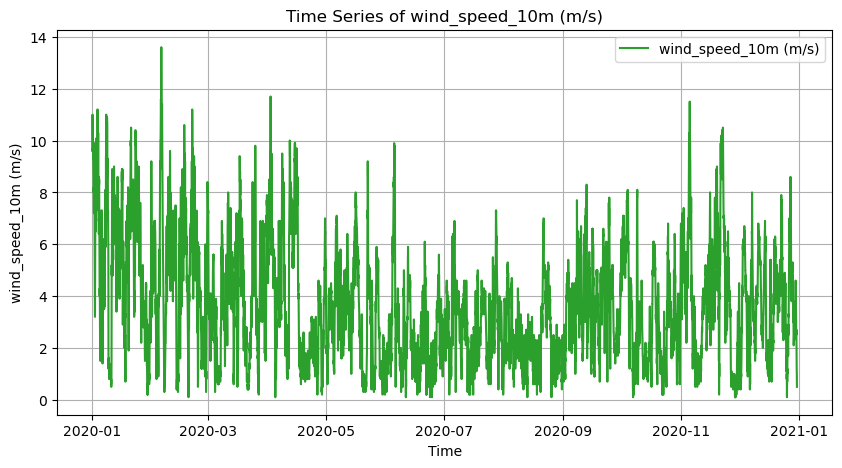

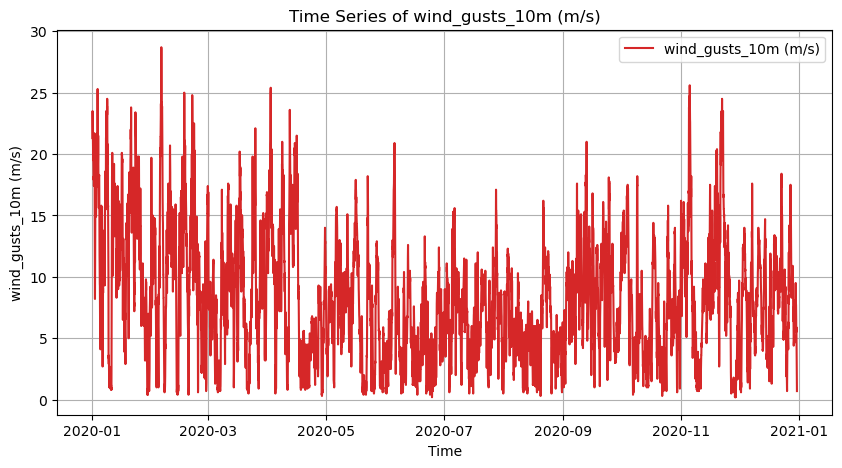

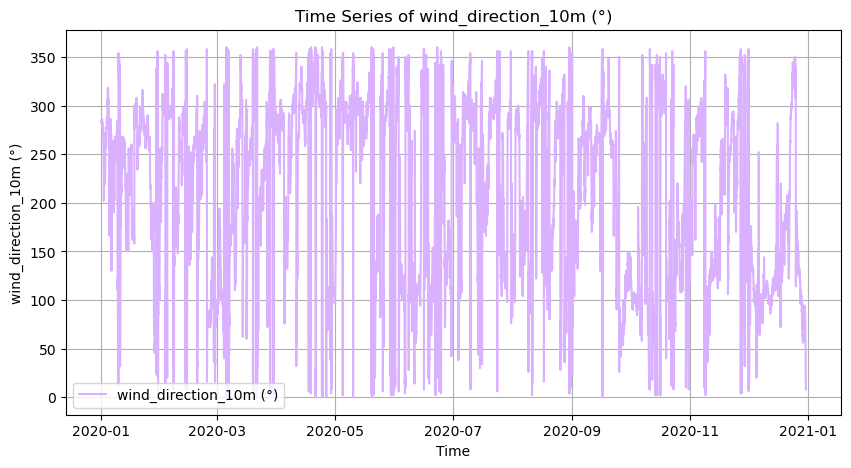

In [31]:
import matplotlib.pyplot as plt

# Define a list of colors (expand or change as needed)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#d9b1ff', '#8c564b']

# Plot each column against time
for i, column in enumerate(df.columns.drop('time')):
    plt.figure(figsize=(10, 5))
    plt.plot(df['time'], df[column], label=column, color=colors[i % len(colors)])
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title(f'Time Series of {column}')
    plt.legend()
    plt.grid()
    plt.show()

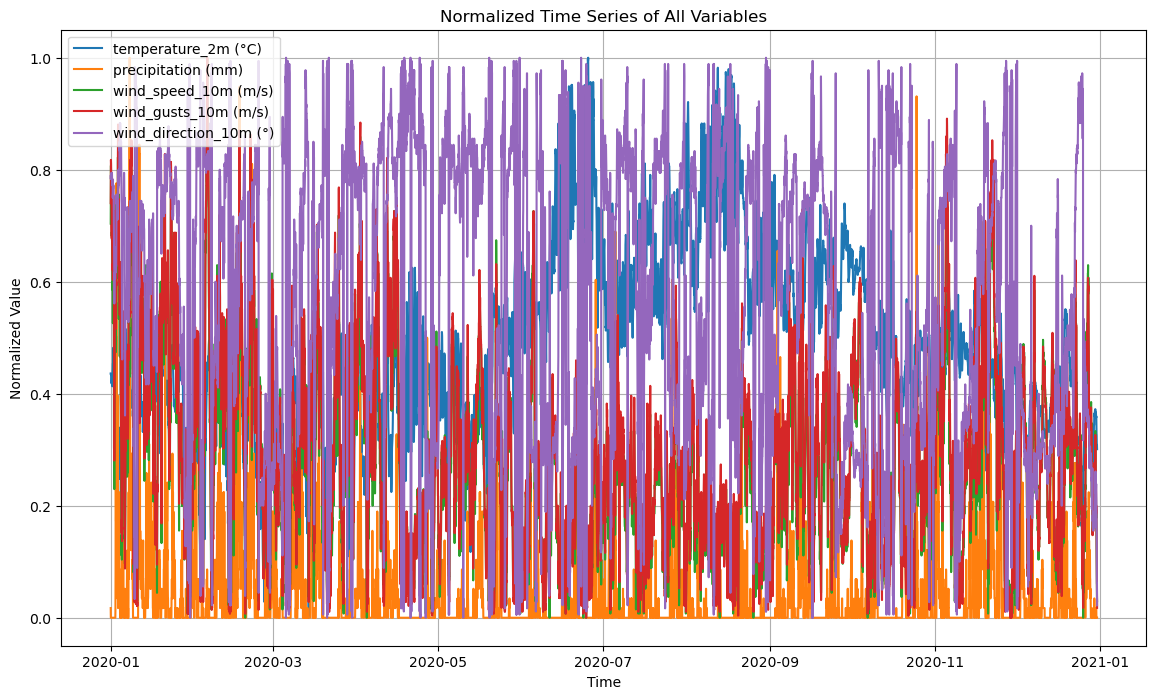

In [21]:
# Normalize the data for better comparison since they are on different scales
df_normalized = df.copy()
for column in df.columns.drop('time'):
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Plot normalized data
plt.figure(figsize=(14, 8))
for i, column in enumerate(df_normalized.columns.drop('time')):
    plt.plot(df_normalized['time'], df_normalized[column], label=column, color=colors[i % len(colors)])
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.title('Normalized Time Series of All Variables')
plt.legend()
plt.grid()
plt.show()

Note: Found this to be a bit messy. Therefore i've researched my way to the idea of a plot with two different y-axes: 

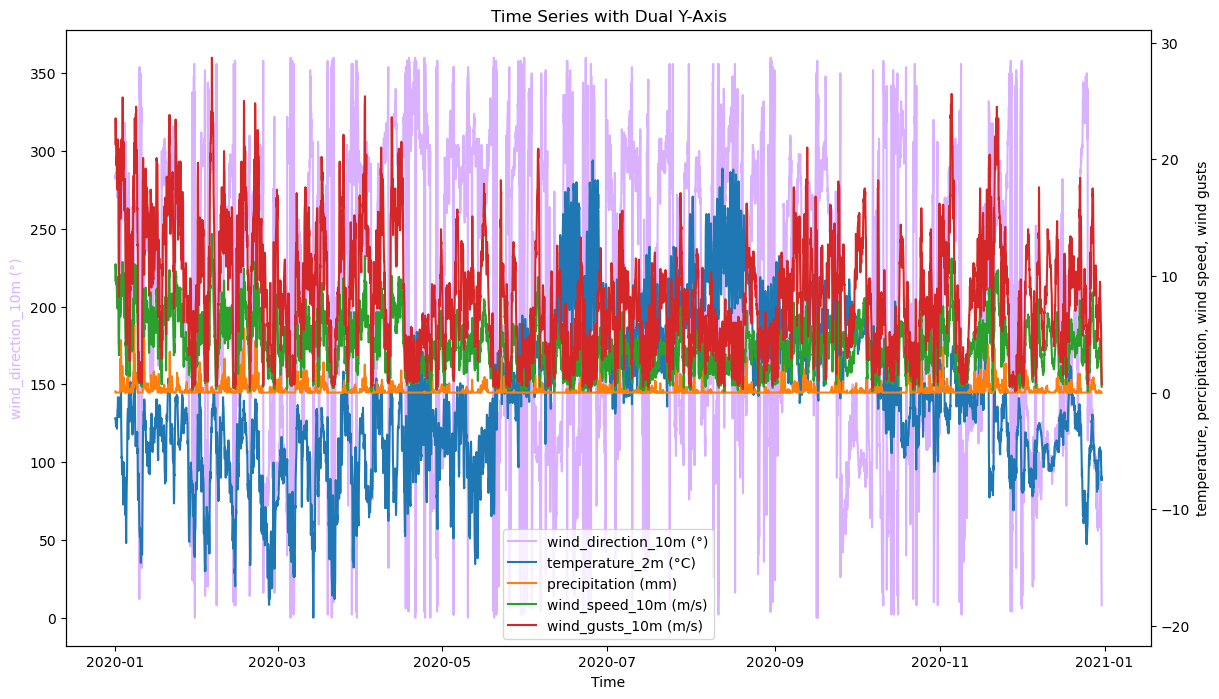

In [ ]:
cols_1 = ["temperature_2m (°C)", "precipitation (mm)", "wind_speed_10m (m/s)", "wind_gusts_10m (m/s)"]
cols_2 = "wind_direction_10m (°)"

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df['time'], df[cols_2], label=cols_2, color="#d9b1ff", zorder=0)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

for col in cols_1:
    ax2.plot(df['time'], df[col], label=col, zorder=1)

ax.set_xlabel('Time')
ax.set_ylabel(cols_2, color="#d9b1ff")
ax2.set_ylabel('temperature, percipitation, wind speed, wind gusts')

lines,labels = ax.get_legend_handles_labels()
lines2,labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title('Time Series with Dual Y-Axis')
plt.show()

## Word log

Started off this project by setting up the repository, defined "streamlit_app.py" with just a title to start off (st.title("IND320 Course Project")). Then ran it localy and verified that it worked, before i deployed it to Streamlit. 

For the data reading and exploration i firstly misunderstood this part, but have now arrived at what I think is the intended way to answer the assignment. I read in the data form the csv file using pandas. I I chose to store the csv file in a directory "assets" just for the sake of "tidyness".

When exploring i utilized the functions .head(), .describe() and .info() to get a quick grasp of what we're dealing with. Followed up by answering the task by plotting all the data (using matplotlibs "pyplot" package). The data was plotted in separate line plots, and then all together. First done through normalized values, then with two different y-axis since some of the data were spread across different scales, and I found the normalized version to be a bit "hard to read" / "messy".

Over to the next part of the task. I've created a directory pages that contains 3 new pages. The app now consists of 4 pages in total when counting the main / landing page. This worked like a charm and found it fascinating that this was all that was needed to get a sidebar with working navigation.

Second_page is filled with a table holding what i found to be the most essential values to get a good overview of the data as well as the required line chart within the column by utilizing .LineChartColumn()

Third_page is filled with plots of the imported data, a drop-down menu for choosing any single column in the dataset og all together. This is done by using the st.selectbox like intended. Also have a slider for selecting a subset of months. Initially i got this part wrong and set up a slider that only defined it to be one month at the time and not multiple. Noticed and fixed it to be according to the task description

Fourth_page is left mostly blank besides for a title. As for what i understood about this part of the assignment this was allowed and there was no intended content for this page rather than it exisitng. 